## Machine Learning Models

## Population Forecasting in Ireland

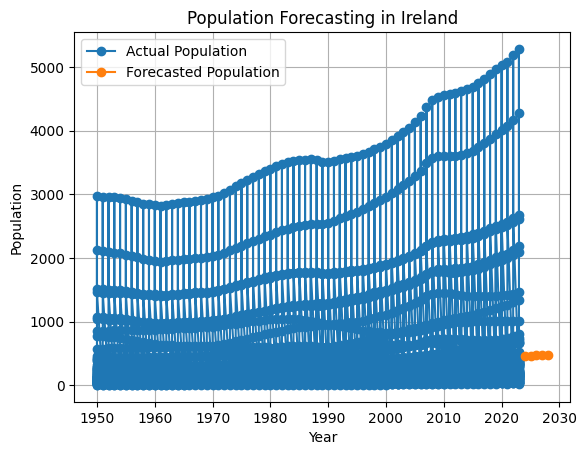

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter rows with non-null population values
df = df.dropna(subset=['VALUE'])

# Create a linear regression model
model = LinearRegression()

# Prepare data for population forecasting
X = df[['Year']]
y = df['VALUE']

# Fit the model
model.fit(X, y)

# Predict population for future years (e.g., the next 5 years)
future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 6)
future_population = model.predict(pd.DataFrame({'Year': future_years}))

# Visualize population forecasting
plt.plot(df['Year'], df['VALUE'], label='Actual Population', marker='o')
plt.plot(future_years, future_population, label='Forecasted Population', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecasting in Ireland')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count for each column
print(missing_values)


STATISTIC Label        0
Year                   0
Age Group              0
Sex                    0
UNIT                   0
VALUE                  0
Population Change    112
dtype: int64


In [23]:
# Calculate the mean of the "Population Change" column
mean_population_change = df['Population Change'].mean()

# Replace missing values with the mean
df['Population Change'].fillna(mean_population_change, inplace=True)


## RandomForestRegressor

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


In [25]:
# Check the data types of all columns
data_types = df.dtypes
print(data_types)


STATISTIC Label       object
Year                   int64
Age Group             object
Sex                   object
UNIT                  object
VALUE                float64
Population Change    float64
dtype: object


In [26]:
# Drop rows with missing values in the target column
df.dropna(subset=['VALUE'], inplace=True)

In [27]:
# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Age Group', 'Sex', 'UNIT'], drop_first=True)


In [28]:
# Split the data into features (X) and the target variable (y)
X = df_encoded.drop('VALUE', axis=1)
y = df_encoded['VALUE']

In [29]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Drop non-numeric columns
non_numeric_columns = ['STATISTIC Label']
X_train = X_train.drop(columns=non_numeric_columns)
X_test = X_test.drop(columns=non_numeric_columns)


In [31]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

In [32]:
# Hyperparameter Tuning with GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [33]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

In [34]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [35]:
# Create a new Random Forest Regressoin with the best hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

In [36]:
# Train the model on the training data
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [37]:
# Make predictions on the test data
predictions = best_rf_model.predict(X_test)


In [38]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 6.682386904761921


In [39]:
from sklearn.metrics import mean_absolute_error


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 6.682386904761921


In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean squared Error (MAE): {mse}')


Mean squared Error (MAE): 1312.5591207610514


In [41]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'mean_squared_error: {rmse}')


mean_squared_error: 36.22925780030625


In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'r2_score: {r2}')



r2_score: 0.9958260261263535


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Load your dataset
# Replace 'YOUR_DATASET.csv' with the actual file path
df = pd.read_csv('/content/PEA01.20231009T211012.csv')

# Step 1: Data Preprocessing
# Drop rows with missing values
df.dropna(subset=['VALUE'], inplace=True)

# Remove the 'UNIT' column
df_encoded = df.drop('UNIT', axis=1)

# One-Hot Encoding for other categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['STATISTIC Label', 'Age Group', 'Sex'], drop_first=True)

# Step 2: Data Splitting (80% train, 20% test)
X = df_encoded.drop('VALUE', axis=1)  # Features
y = df_encoded['VALUE']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection (Support Vector Regressor)
svr_model = SVR()

# Step 4: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Step 5: Train the Model with Best Hyperparameters
best_svr_model = SVR(
    C=best_params['C'],
    epsilon=best_params['epsilon'],
    kernel=best_params['kernel']
)

best_svr_model.fit(X_train, y_train)

# Step 6: Model Evaluation
predictions = best_svr_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# You can also further evaluate the model with other regression metrics if needed.


Mean Absolute Error (MAE): 99.16514977441257


In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [71]:
# Calculate R2 score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

R-squared (R2) Score: 0.7345147664243825
Mean Absolute Error (MAE): 99.16514977441257
Mean Squared Error (MSE): 83485.20506014343
